# Prikupljanje i predobrada podataka
## Nedostajući podaci
### Petra Milosavljević 1582

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, classification_report
import seaborn as sns

import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include='object').columns.tolist()

In [55]:
df[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [56]:
df[numerical].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
df.duplicated().sum()

111

In [59]:
df = df.drop_duplicates(keep=False)
df.duplicated().sum()

0

Survived
0    415
1    309
Name: count, dtype: int64


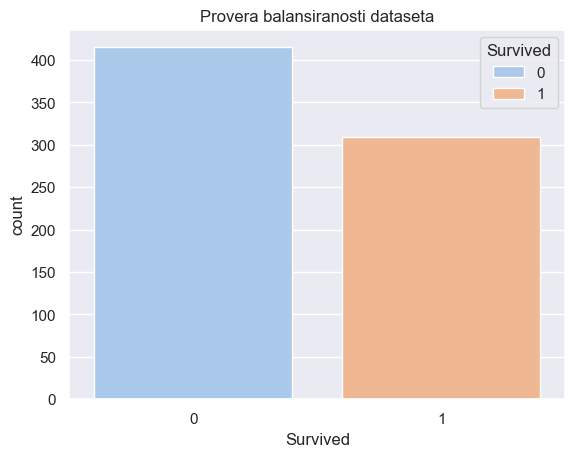

In [60]:
sns.set(font_scale=1)
sns.countplot(x='Survived', data=df, palette='pastel', hue='Survived')
plt.title('Provera balansiranosti dataseta')

print(df["Survived"].value_counts())

In [61]:
categorical = df.select_dtypes(include='object').columns.tolist()

for key in categorical:
    print(key + ':\n', df[key].unique())

Sex:
 ['male' 'female']
Embarked:
 ['S' 'C' 'Q' nan]


In [62]:
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

df['Embarked'] = pd.Series(label_encoder_embarked.fit_transform(df['Embarked'].dropna()), index=df['Embarked'].dropna().index)
df['Embarked'] = df['Embarked'].reindex(df.index, fill_value=np.nan)

df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])

for key in categorical:
    print(key + ':\n', df[key].unique())

Sex:
 [1 0]
Embarked:
 [ 2.  0.  1. nan]


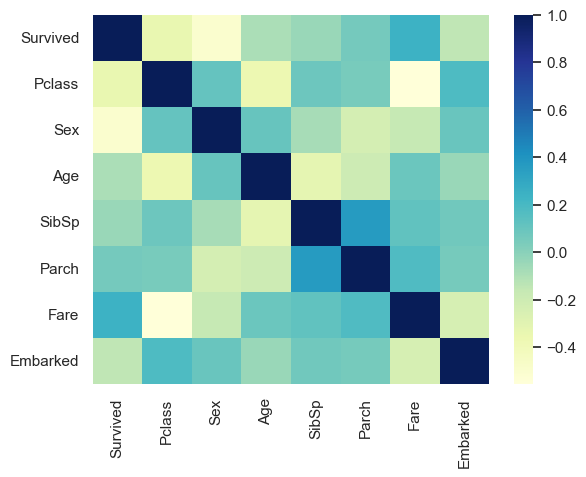

In [63]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu", fmt='g')
plt.show()

In [64]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         81
SibSp        0
Parch        0
Fare         0
Embarked     2
dtype: int64

In [65]:
df.isnull().mean()*100 

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         11.187845
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.276243
dtype: float64

In [66]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
imputation_results = {}

# 1. Deletion
X_train_deletion = X_train.dropna()
X_test_deletion = X_test.dropna()
idx = X_train_deletion.index
y_train_deletion = y_train.loc[idx]
idx = X_test_deletion.index
y_test_deletion = y_test.loc[idx]

scaler = StandardScaler()
scaler.fit(X_train_deletion)
X_train_deletion = pd.DataFrame(scaler.transform(X_train_deletion), columns=X.columns)
X_test_deletion = pd.DataFrame(scaler.transform(X_test_deletion), columns=X.columns)

df_listwise = df.dropna()

# 2. Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
X_train_mean = mean_imputer.fit_transform(X_train)
X_test_mean = mean_imputer.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_mean)
X_train_mean = pd.DataFrame(scaler.transform(X_train_mean), columns=X.columns)
X_test_mean = pd.DataFrame(scaler.transform(X_test_mean), columns=X.columns)

# 3. Median Imputation
median_imputer = SimpleImputer(strategy='median')
X_train_median = median_imputer.fit_transform(X_train)
X_test_median = median_imputer.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_median)
X_train_median = pd.DataFrame(scaler.transform(X_train_median), columns=X.columns)
X_test_median = pd.DataFrame(scaler.transform(X_test_median), columns=X.columns)

# 4. Mode Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train_mode = mode_imputer.fit_transform(X_train)
X_test_mode = mode_imputer.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_mode)
X_train_mode = pd.DataFrame(scaler.transform(X_train_mode), columns=X.columns)
X_test_mode = pd.DataFrame(scaler.transform(X_test_mode), columns=X.columns)

# 5. KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn = knn_imputer.fit_transform(X_train)
X_test_knn = knn_imputer.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_knn)
X_train_knn = pd.DataFrame(scaler.transform(X_train_knn), columns=X.columns)
X_test_knn = pd.DataFrame(scaler.transform(X_test_knn), columns=X.columns)

# 6. Regression Imputation
reg_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=1)
reg_imputer.fit(X_train)
X_train_reg = reg_imputer.transform(X_train)
X_test_reg = reg_imputer.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_reg)
X_train_reg = pd.DataFrame(scaler.transform(X_train_reg), columns=X.columns)
X_test_reg = pd.DataFrame(scaler.transform(X_test_reg), columns=X.columns)

# 7. Mice Imputation
mice_imputer = IterativeImputer(estimator=LinearRegression(), random_state=42, max_iter=20)
mice_imputer.fit(X_train)
X_train_mice = mice_imputer.transform(X_train)
X_test_mice = mice_imputer.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_mice)
X_train_mice = pd.DataFrame(scaler.transform(X_train_mice), columns=X.columns)
X_test_mice = pd.DataFrame(scaler.transform(X_test_mice), columns=X.columns)

In [69]:
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    # auc = roc_auc_score(y_test, y_pred)
    # acc = accuracy_score(y_test, y_pred)
    return report

In [70]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

In [71]:
for clf_name, clf in classifiers.items():
    imputation_results[clf_name] = {}

    imputation_results[clf_name]['Deletion'] = evaluate_model(X_train_deletion, X_test_deletion, y_train_deletion, y_test_deletion, clf)
    imputation_results[clf_name]['Mean Imputation'] = evaluate_model(X_train_mean, X_test_mean, y_train, y_test, clf)
    imputation_results[clf_name]['Median Imputation'] = evaluate_model(X_train_median, X_test_median, y_train, y_test, clf)
    imputation_results[clf_name]['Mode Imputation'] = evaluate_model(X_train_mode, X_test_mode, y_train, y_test, clf)
    imputation_results[clf_name]['KNN Imputation'] = evaluate_model(X_train_knn, X_test_knn, y_train, y_test, clf)
    imputation_results[clf_name]['Regression Imputation'] = evaluate_model(X_train_reg, X_test_reg, y_train, y_test, clf)
    imputation_results[clf_name]['MICE Imputation'] = evaluate_model(X_train_mice, X_test_mice, y_train, y_test, clf)

In [72]:
for clf_name, results in imputation_results.items():
    print(f"\n{clf_name}:")
    for method, score in results.items():
        print(f"{method}:\n {score}")


Logistic Regression:
Deletion:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        66
           1       0.85      0.64      0.73        64

    accuracy                           0.77       130
   macro avg       0.79      0.77      0.76       130
weighted avg       0.79      0.77      0.77       130

Mean Imputation:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        72
           1       0.80      0.64      0.71        73

    accuracy                           0.74       145
   macro avg       0.75      0.74      0.74       145
weighted avg       0.75      0.74      0.74       145

Median Imputation:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        72
           1       0.80      0.64      0.71        73

    accuracy                           0.74       145
   macro avg       0.75      0.74      0.74       145
wei